Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
df = pd.read_excel('/Users/yoshii/Desktop/Retail_Sales.xlsx')

Data Cleaning

See dataframe

In [2]:
# first 5 rows
df.head(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [3]:
# see dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


Find Duplicate row

In [4]:
# duplicated rows
df.duplicated().sum()

np.int64(0)

Rename column

In [5]:
# convert to lowercase format and space replace with (_)
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    1000 non-null   int64         
 1   date              1000 non-null   datetime64[ns]
 2   customer_id       1000 non-null   object        
 3   gender            1000 non-null   object        
 4   age               1000 non-null   int64         
 5   product_category  1000 non-null   object        
 6   quantity          1000 non-null   int64         
 7   price_per_unit    1000 non-null   int64         
 8   total_amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


Find Missing Data

In [6]:
# see the null
df.isna().sum()

transaction_id      0
date                0
customer_id         0
gender              0
age                 0
product_category    0
quantity            0
price_per_unit      0
total_amount        0
dtype: int64

Change Data type

In [7]:
# change Product Category data type
df['product_category'] = df['product_category'].astype('category')
print(df.dtypes)

transaction_id               int64
date                datetime64[ns]
customer_id                 object
gender                      object
age                          int64
product_category          category
quantity                     int64
price_per_unit               int64
total_amount                 int64
dtype: object


In [8]:
# change Gender data type
df['gender'] = df['gender'].astype('category')

Data Analysis

See the Virsualization of distribution and Stats

Gender Count

In [9]:
df['gender'].value_counts()

gender
Female    510
Male      490
Name: count, dtype: int64

<Axes: ylabel='count'>

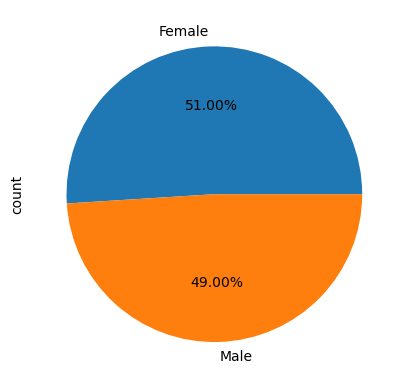

In [10]:
# Gender Chart
df['gender'].value_counts().plot(kind='pie', autopct='%.2f%%')

Product Category Count

In [11]:
df['product_category'].value_counts()

product_category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

<Axes: xlabel='product_category'>

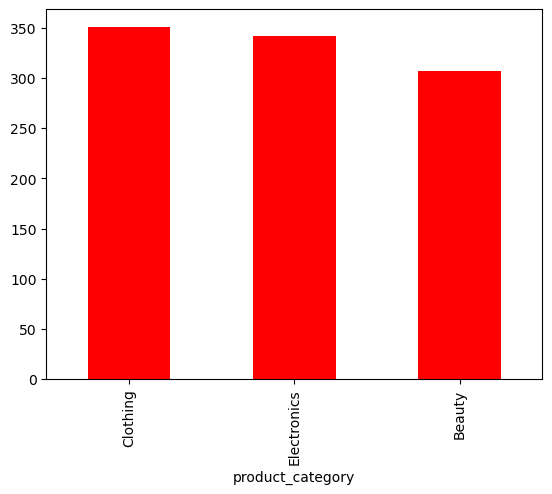

In [12]:
# Product Category Chart
df['product_category'].value_counts().plot(kind='bar', color='red')

Age  Stats

In [13]:
df['age'].describe()

count    1000.00000
mean       41.39200
std        13.68143
min        18.00000
25%        29.00000
50%        42.00000
75%        53.00000
max        64.00000
Name: age, dtype: float64

<Axes: ylabel='Frequency'>

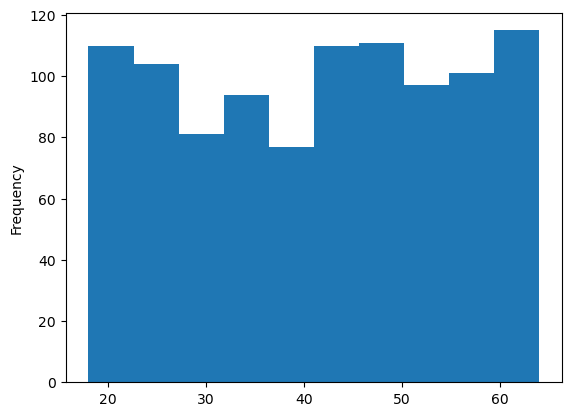

In [14]:
# Age Chart
df['age'].plot(kind='hist')

Price per Unit Stats

In [15]:
df['price_per_unit'].describe()

count    1000.000000
mean      179.890000
std       189.681356
min        25.000000
25%        30.000000
50%        50.000000
75%       300.000000
max       500.000000
Name: price_per_unit, dtype: float64

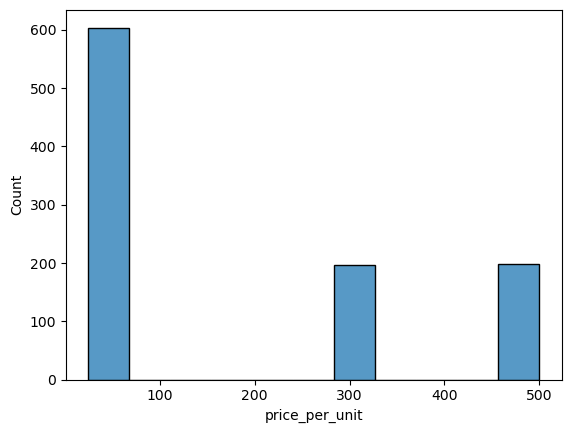

In [17]:
# Price per unit Chart
sns.histplot(df, x='price_per_unit')
plt.show()

Total Amount Stats

In [18]:
df['total_amount'].describe()

count    1000.000000
mean      456.000000
std       559.997632
min        25.000000
25%        60.000000
50%       135.000000
75%       900.000000
max      2000.000000
Name: total_amount, dtype: float64

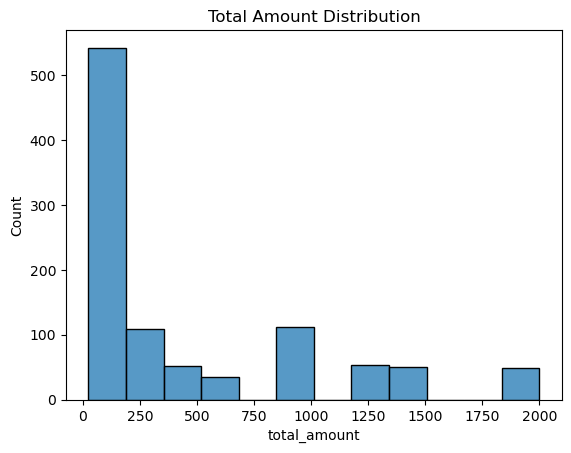

In [19]:
# Total Amount Chart
sns.histplot(df['total_amount'])
plt.title('Total Amount Distribution')
plt.show()

Correlation Coefficient Analysis

Heat Map

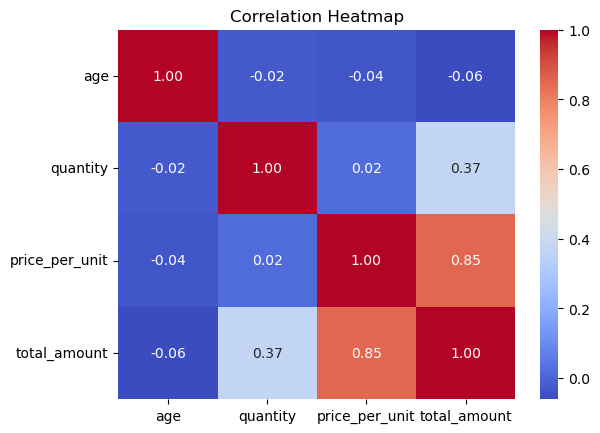

In [20]:
correlation_mat = df[['age', 'quantity', 'price_per_unit', 'total_amount']].corr()
sns.heatmap(correlation_mat, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

The heatmap show the correlation coefficient between price per unit and total amount spent (0.8519) indicates a strong positive linear relationship. This suggests that as the price per unit increases, the total amount spent tends to increase as well.